## 음주 여부에 따라 건강검진 수치 차이가 있을까?
##  신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

* 분석을 통해 가설을 검정해 봅니다.

## 라이브러리 로드

In [12]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


## 한글폰트 설정

In [ ]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# # 나눔고딕 설치
# # 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# # 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()


# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [13]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
import matplotlib.pyplot as plt
# 운영체제별 설정을 위해 로드 합니다.
import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.

# 마이너스 폰트 깨지는 문제에 대한 대처


In [14]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기
* 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.

* 건강검진정보(2018) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
* 2019년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2019년 데이터에 맞게 고쳐주시면 됩니다.
* 2019년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [76]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df=pd.read_csv('/content/NHIS_OPEN_GJ_2017.CSV', encoding="cp949")

### 데이터 미리보기

In [77]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 기본정보 보기

In [78]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [79]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [80]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

,0
기준년도,int64
가입자일련번호,int64
성별코드,int64
연령대코드(5세단위),int64
시도코드,int64
신장(5Cm단위),float64
체중(5Kg 단위),float64
허리둘레,float64
시력(좌),float64
시력(우),float64


## 결측치 보기

In [25]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

,0
기준년도,0
가입자일련번호,0
성별코드,0
연령대코드(5세단위),0
시도코드,0
신장(5Cm단위),262
체중(5Kg 단위),268
허리둘레,440
시력(좌),288
시력(우),279


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args

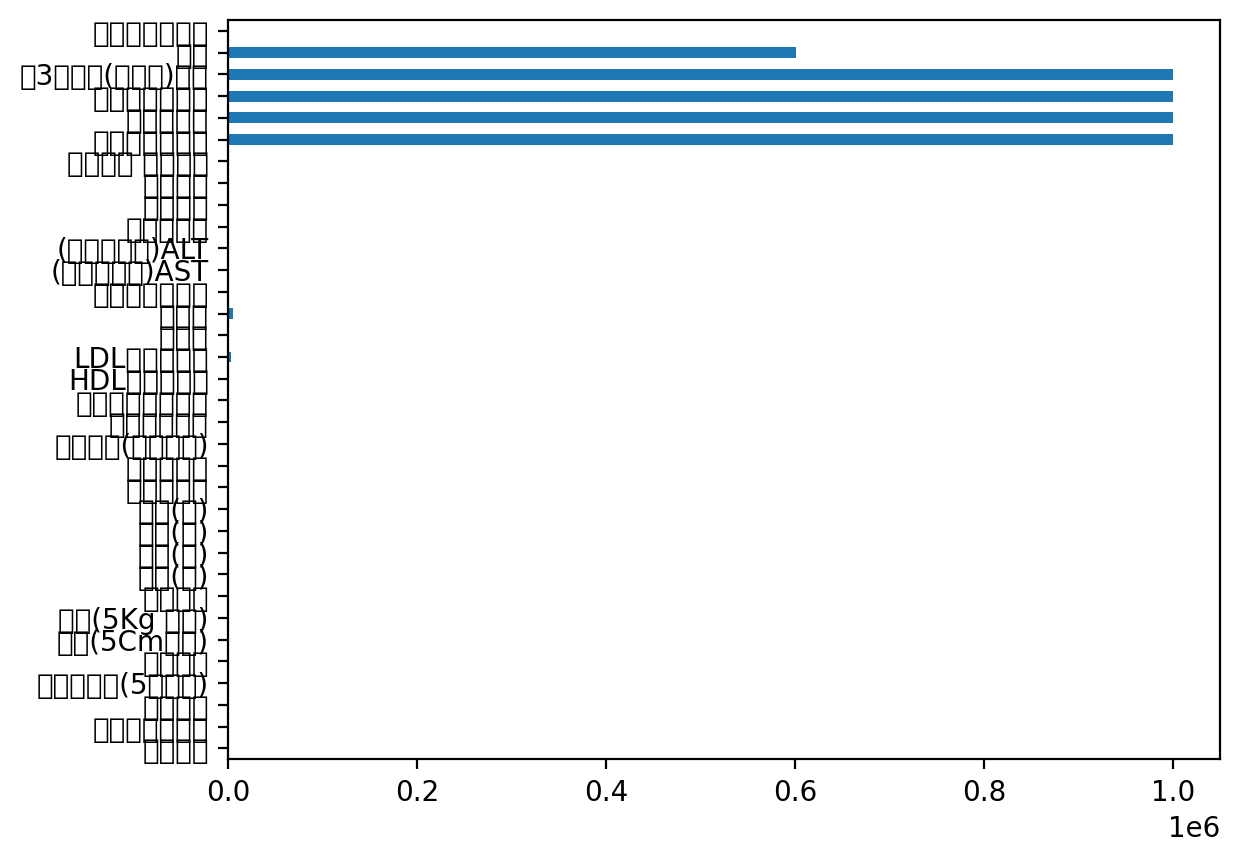

In [32]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다.
df.isna().sum().plot.barh()

## 일부 데이터 요약하기

In [35]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [36]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 요약합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


## value_counts 로 값 집계하기

In [37]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df["성별코드"].value_counts()

,count
성별코드,
1,531172
2,468828


In [38]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df["흡연상태"].value_counts()

,count
흡연상태,
1.0,608587
3.0,215061
2.0,176192


## groupby 와 pivot_table 사용하기

### groupby

In [81]:
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(["성별코드"])["가입자일련번호"].mean()

,가입자일련번호
성별코드,
1,499946.580386
2,500061.589758


In [82]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [83]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [84]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [85]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

### pivot_table
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [86]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
df.pivot_table(index="음주여부",values="가입자일련번호",aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [87]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
df.pivot_table(index="음주여부",values="감마지티피",aggfunc=['mean','median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [88]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다.


In [89]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다.


In [90]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
df.pivot_table(index="음주여부",values="감마지티피",aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [91]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다.


## 전체 데이터 시각화 하기
* 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

### 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다.
* 히스토그램을 사용하면 수치데이터를 bin 의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
* 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args

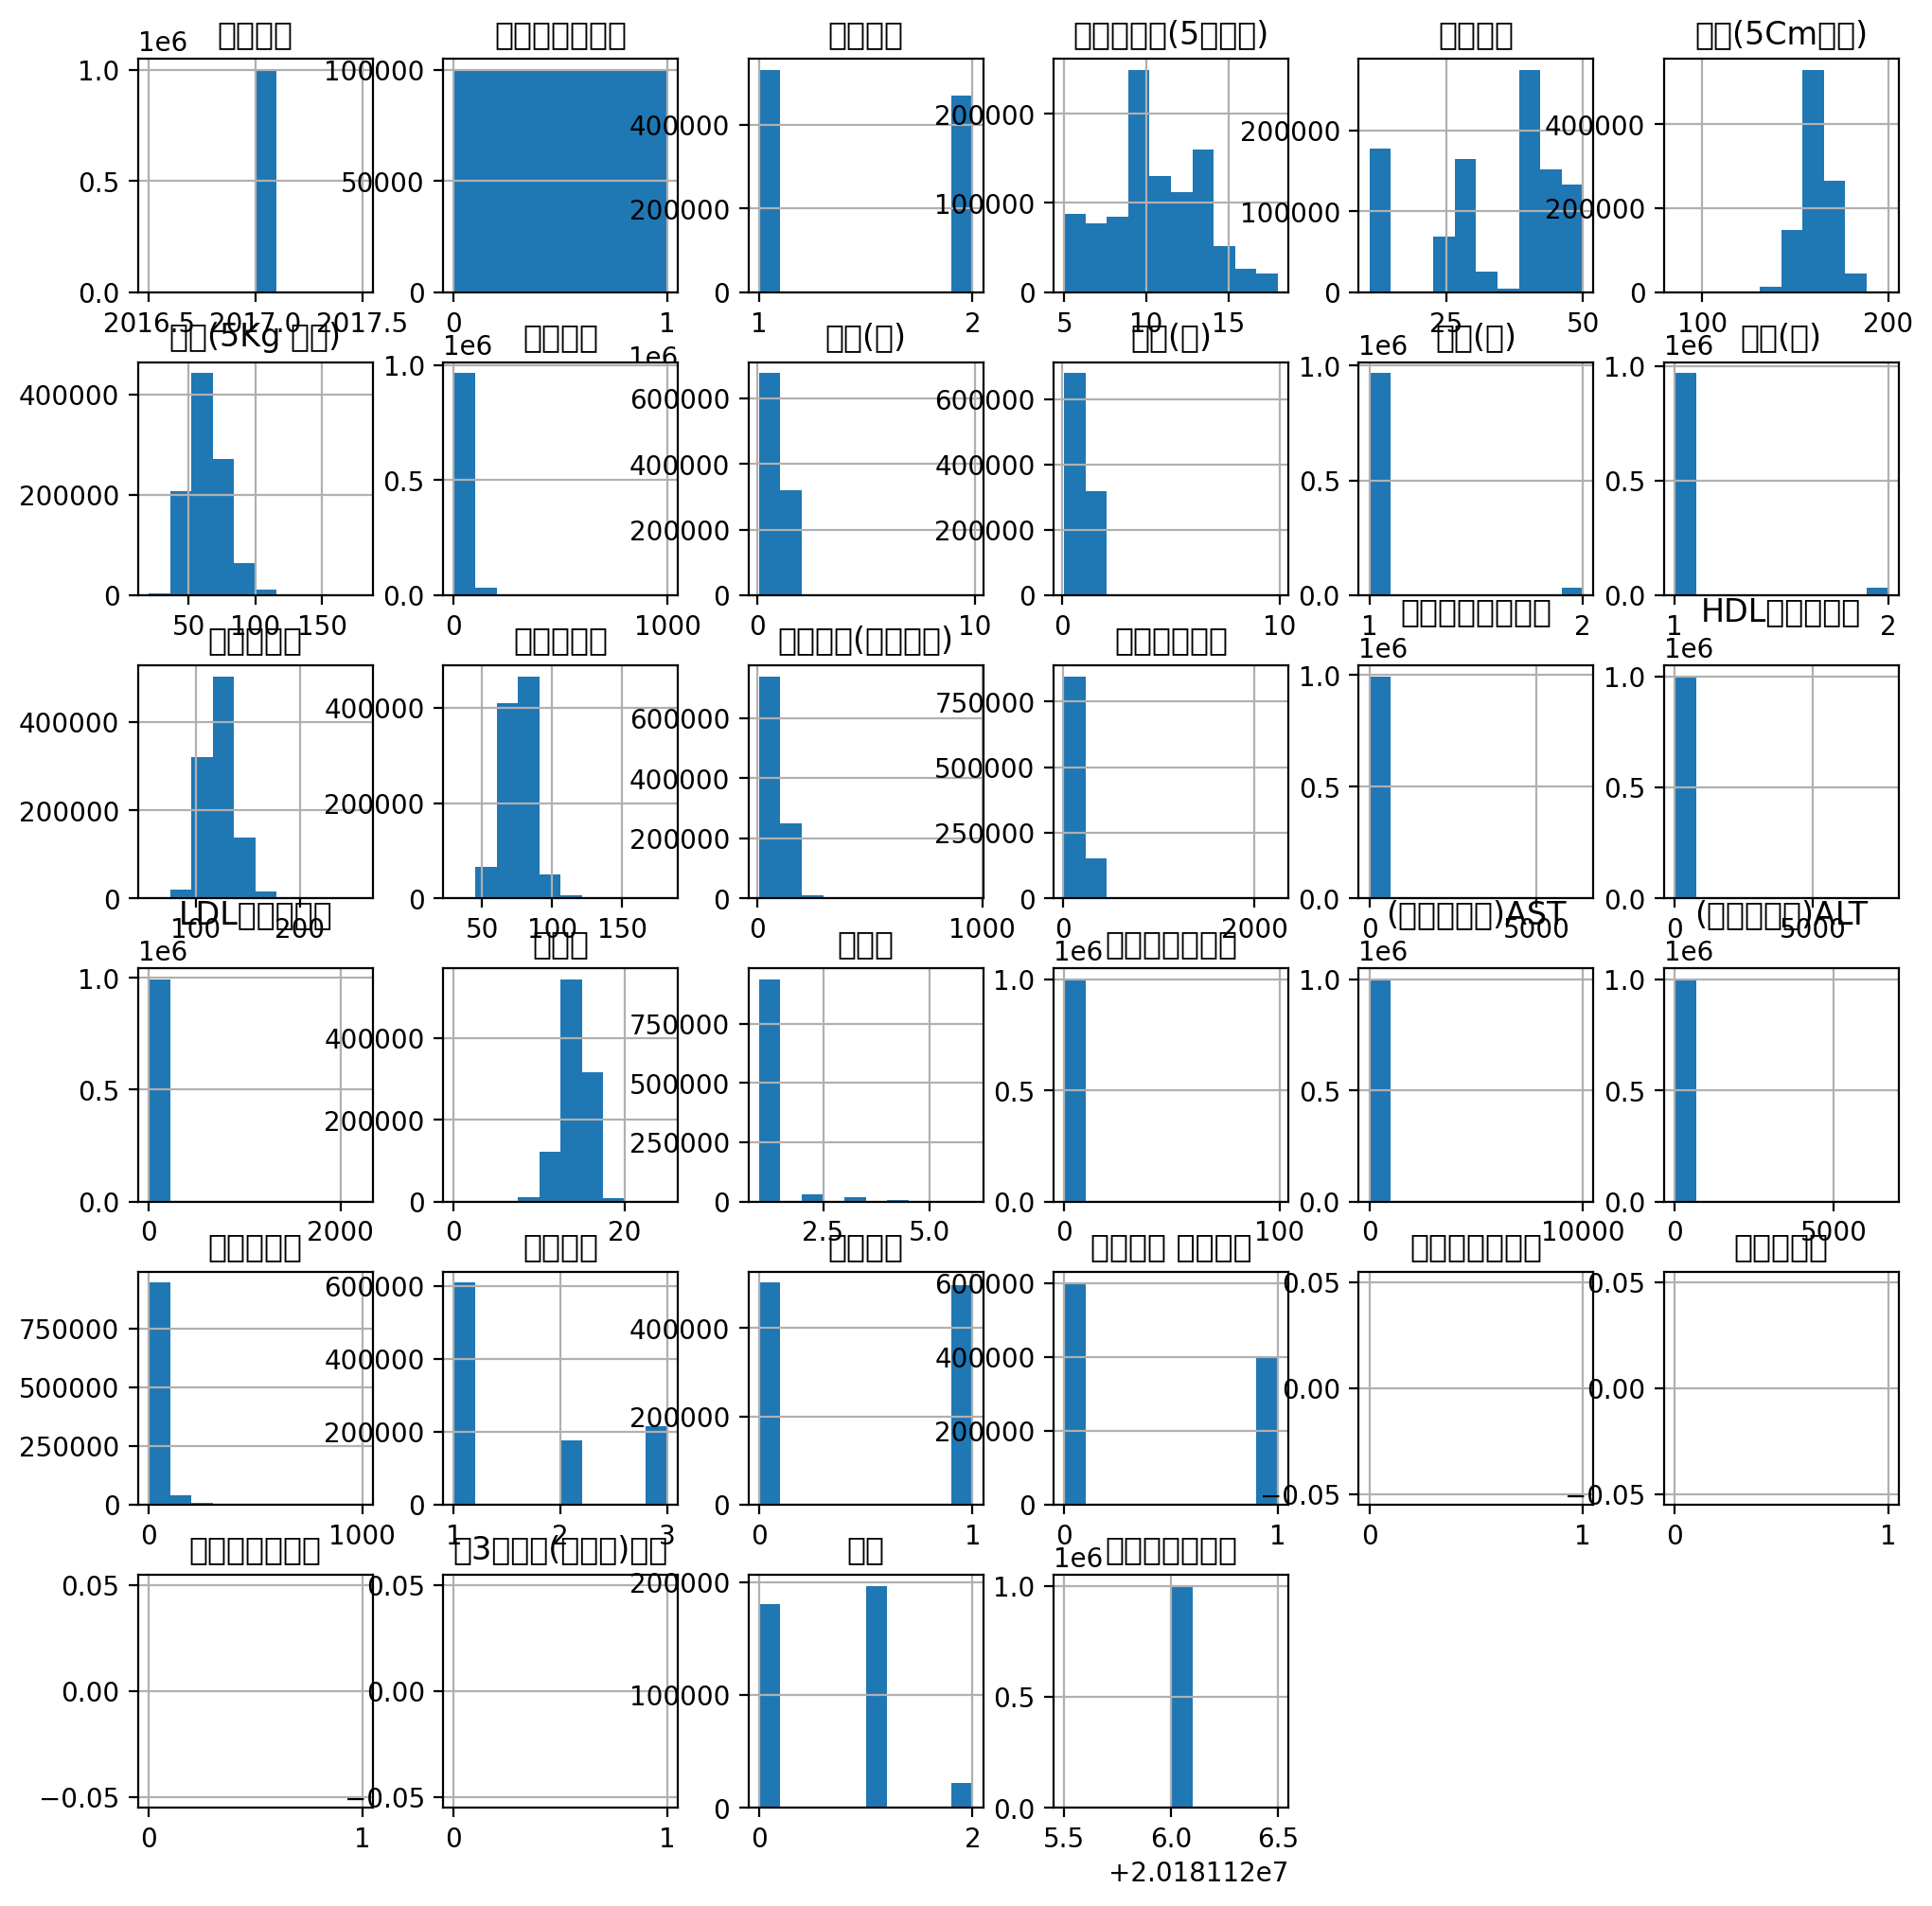

In [52]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize=(12, 12))


### 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
* 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
* iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.

In [ ]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]


In [ ]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다.


In [ ]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그립니다.



## 샘플데이터 추출하기
* seaborn 의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
* 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [ ]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.



## 데이터 시각화 도구 Seaborn 사용하기
* https://seaborn.pydata.org/
* seaborn 은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

## 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
* value_counts 로 구한 값을 시각화 한다고 보면 됩니다.

### countplot - 음주여부

In [64]:
# 음주여부에 따른 countplot을 그립니다.
df_sample=df.sample(1000, random_state=1)


<Axes: xlabel='음주여부'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from

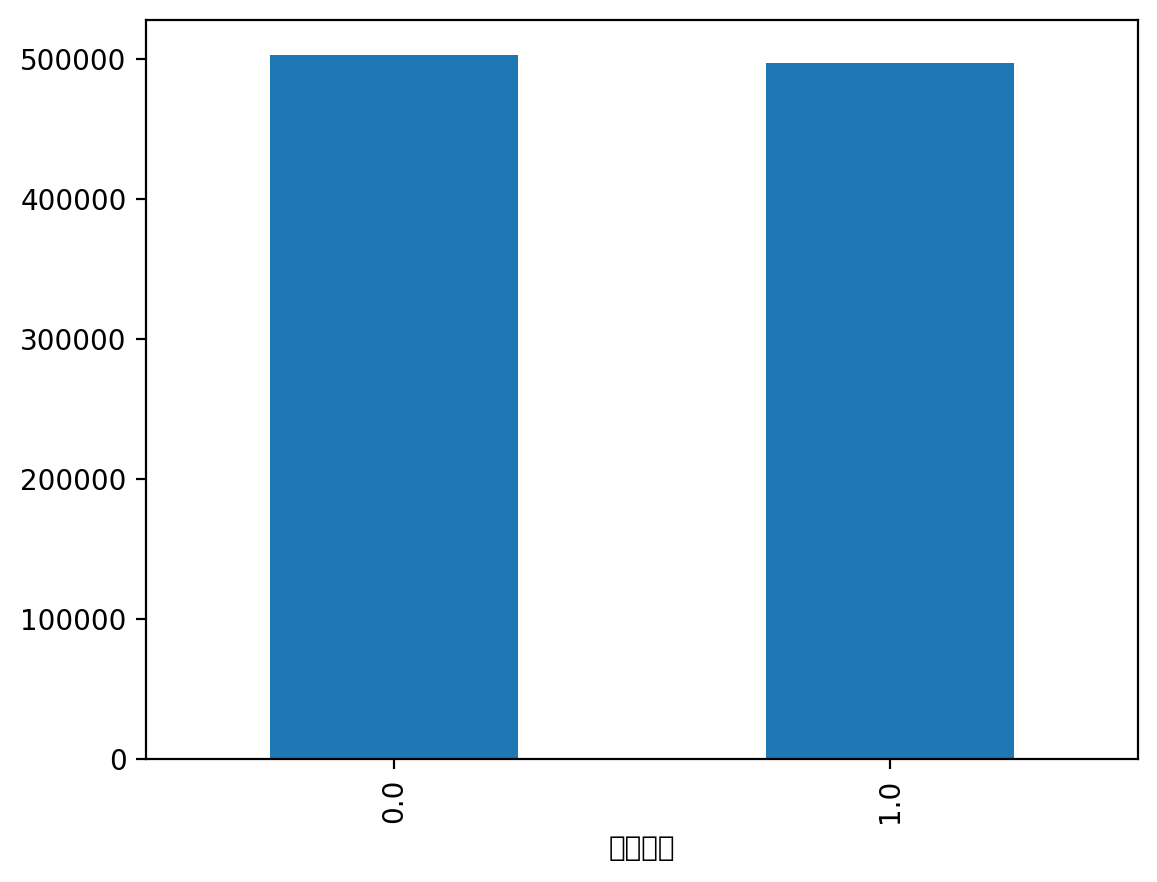

In [54]:
df["음주여부"].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from

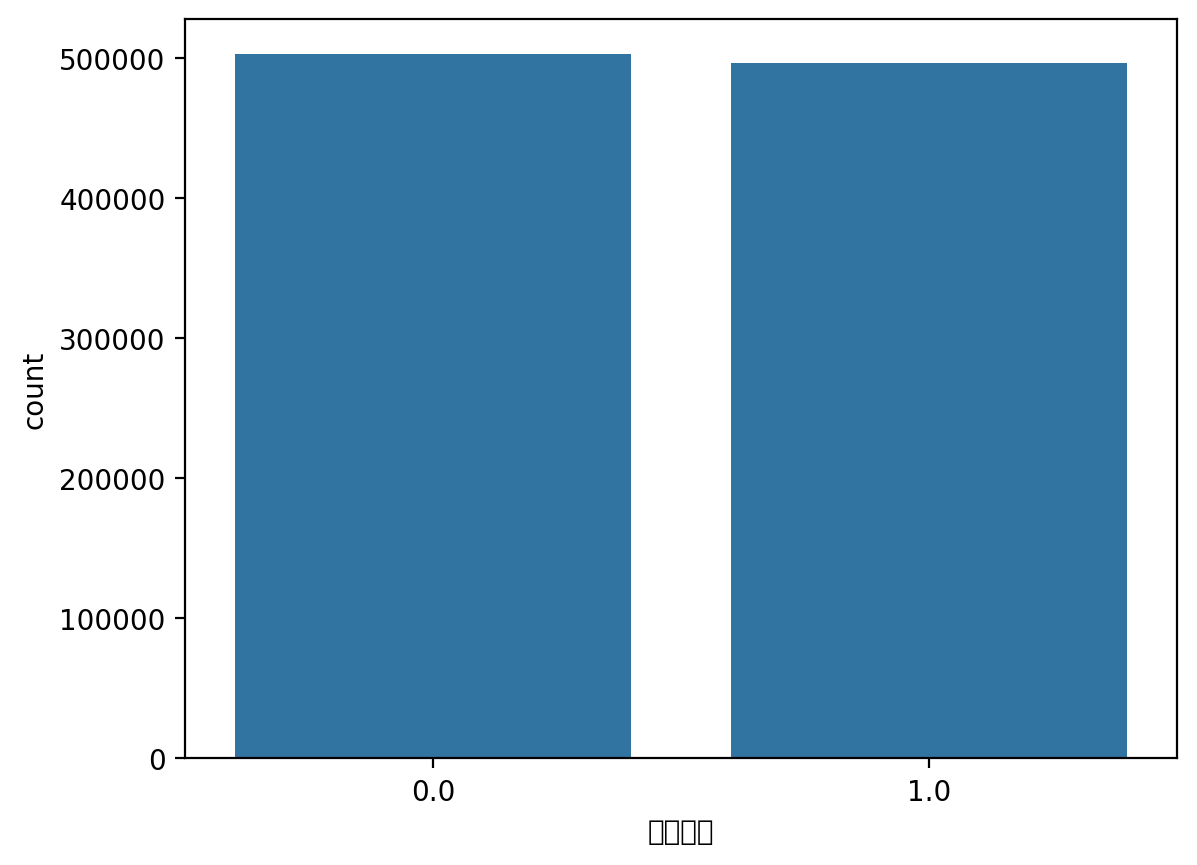

In [55]:
sns.countplot(x="음주여부", data=df)

### hue 옵션 사용하기

<Axes: xlabel='음주여부', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*

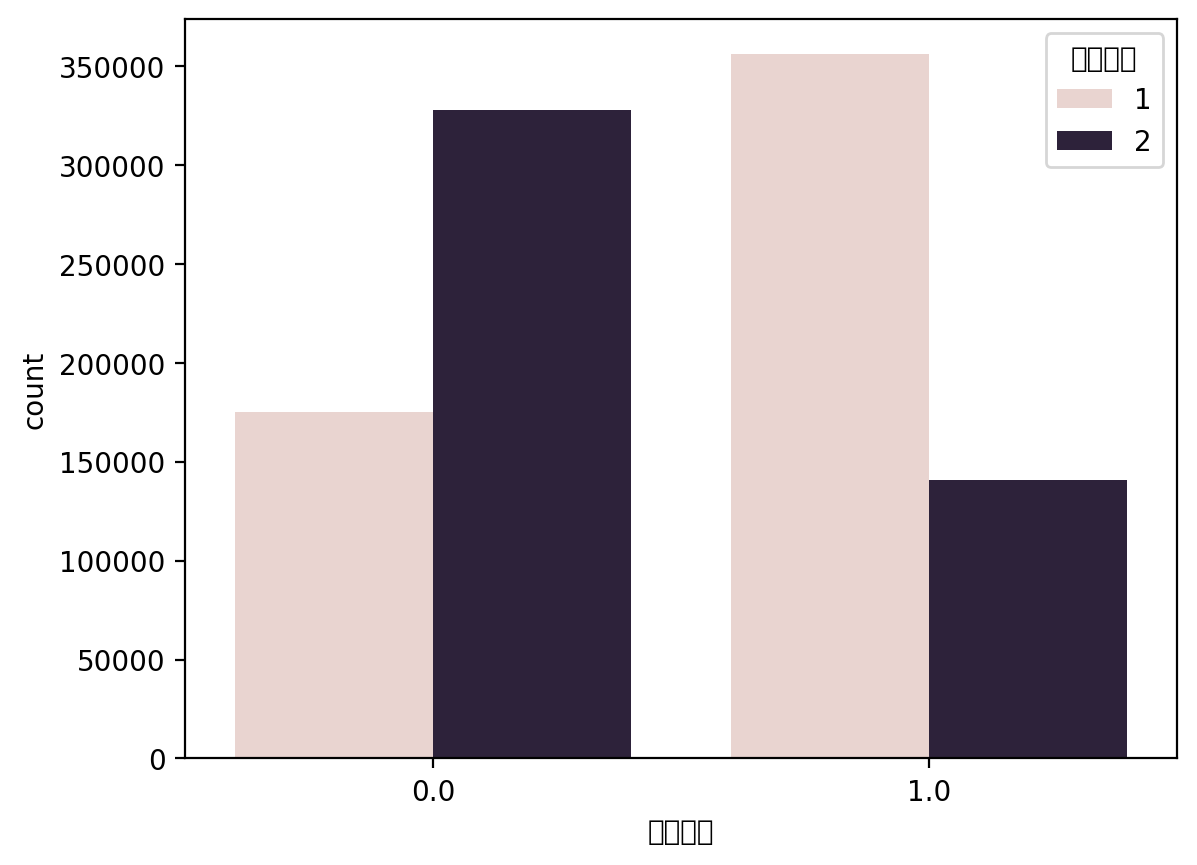

In [56]:
# 음주여부에 따른 countplot을 그리고 hue 를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale=1.5, font="AppleGothic")
# Window
# sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(x="음주여부", data=df, hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

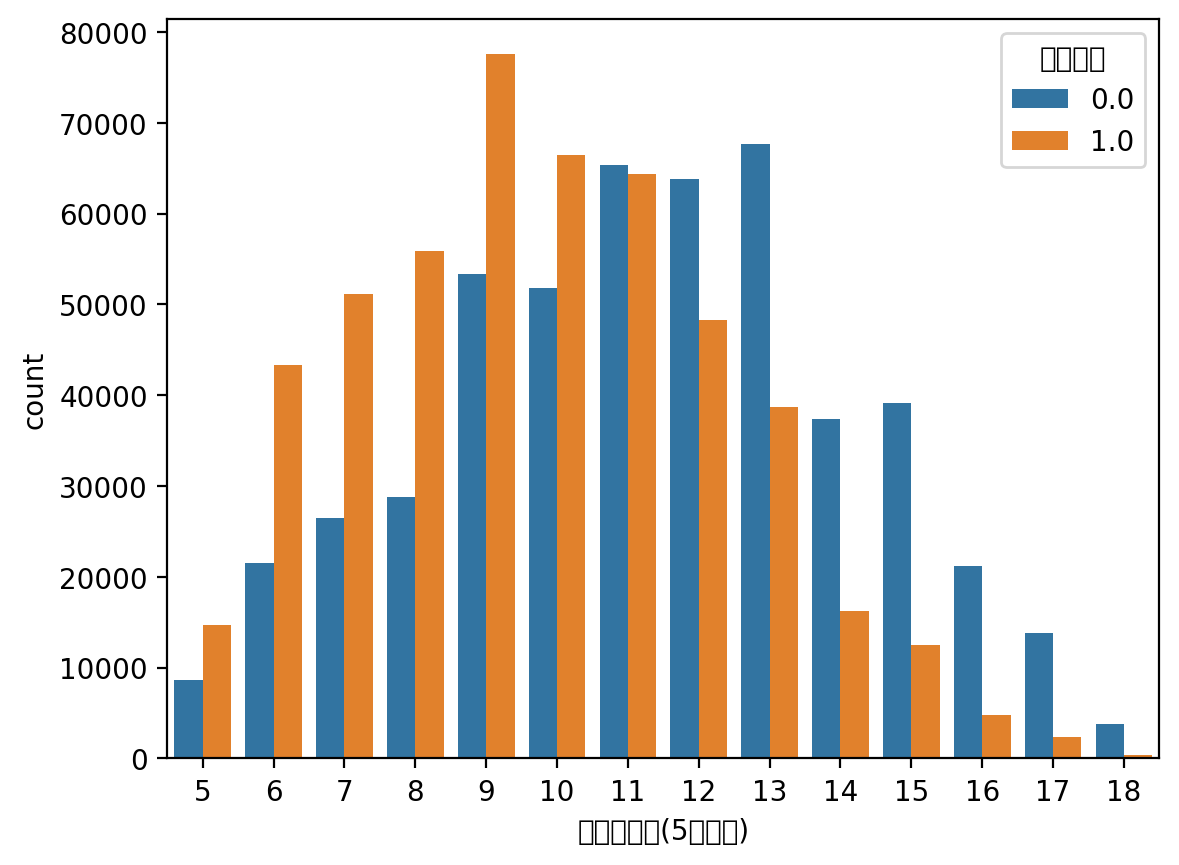

In [57]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

### countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
* 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
* 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing 

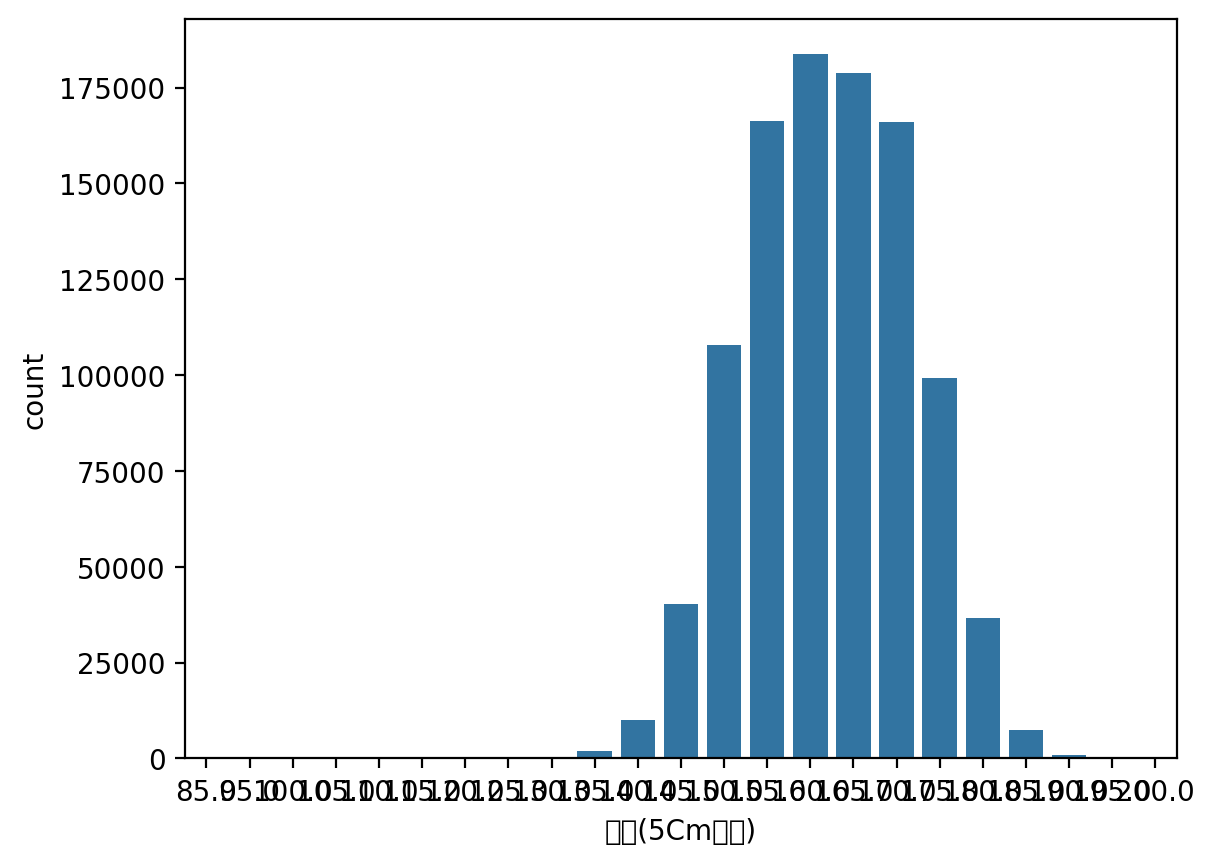

In [60]:
# counplot으로 키를 봅니다.
sns.countplot(data=df, x="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(

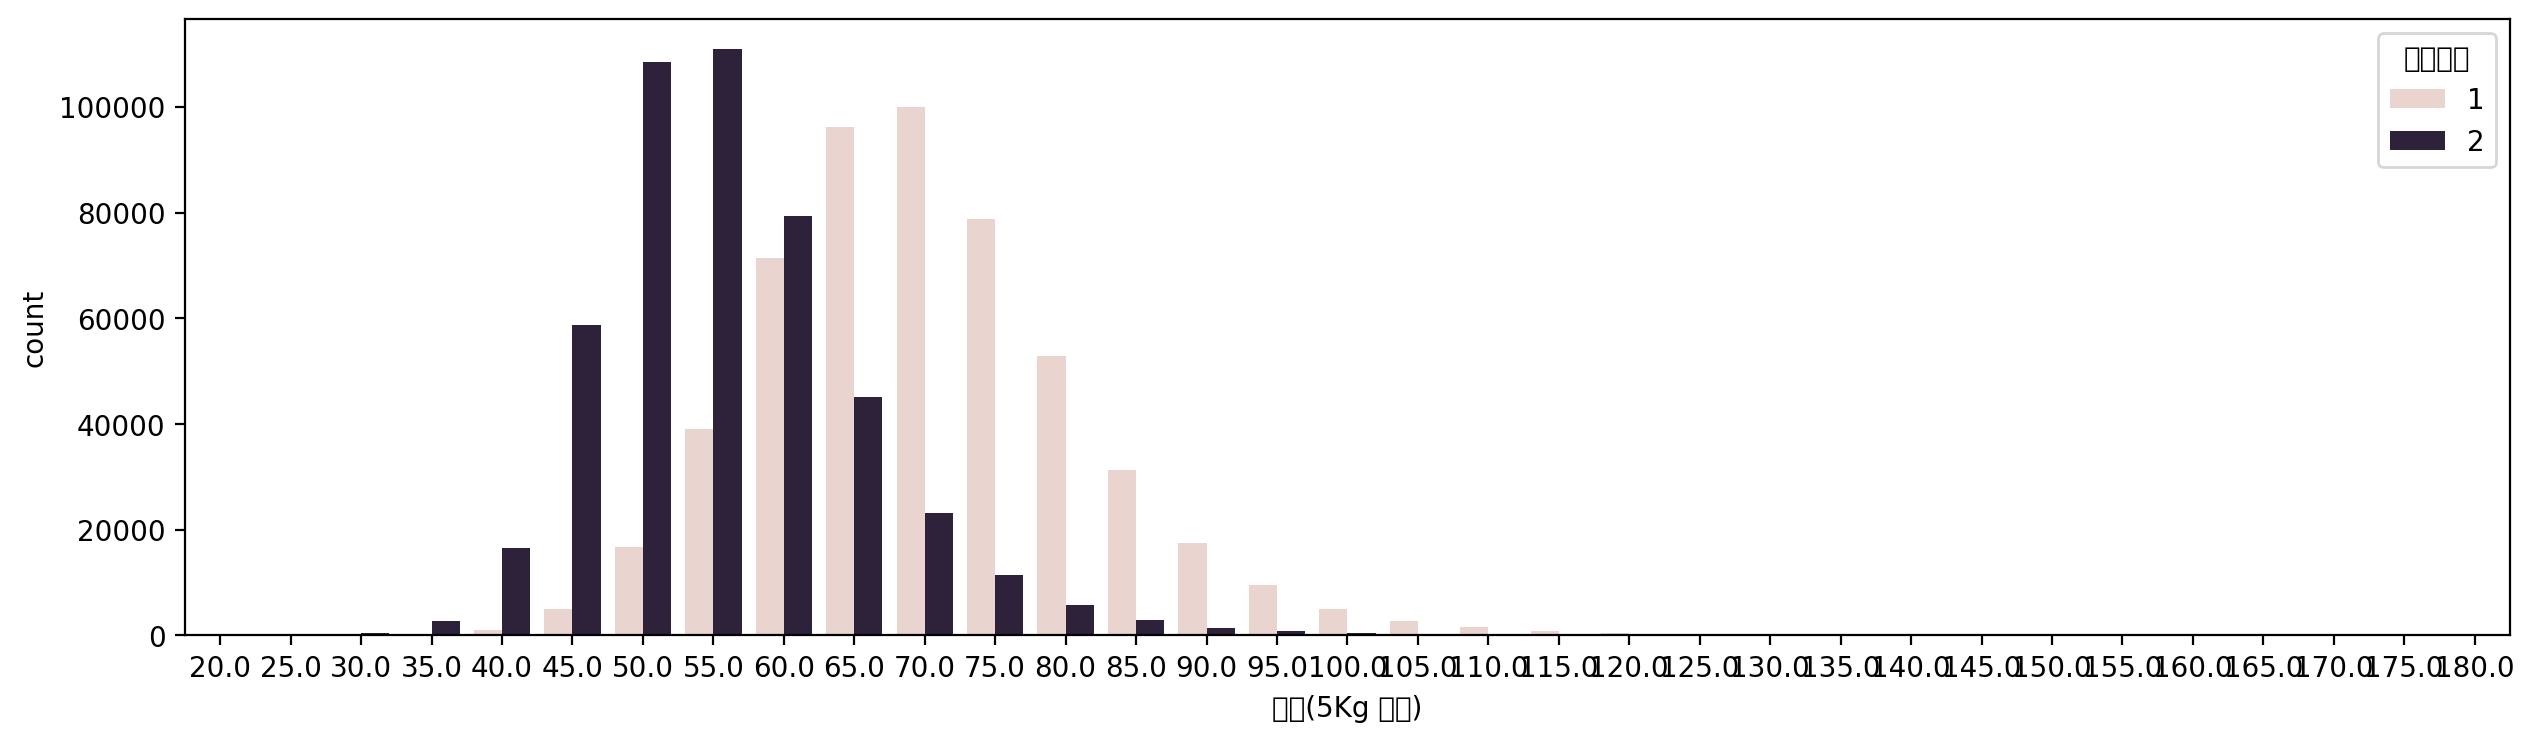

In [61]:
# counplot으로 체중을 봅니다.
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

In [ ]:
# counplot으로 신장(5Cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.


In [ ]:
# 성별에 따른 체중의 차이를 봅니다.



### barplot - 수치형 vs 범주형 데이터 시각화

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

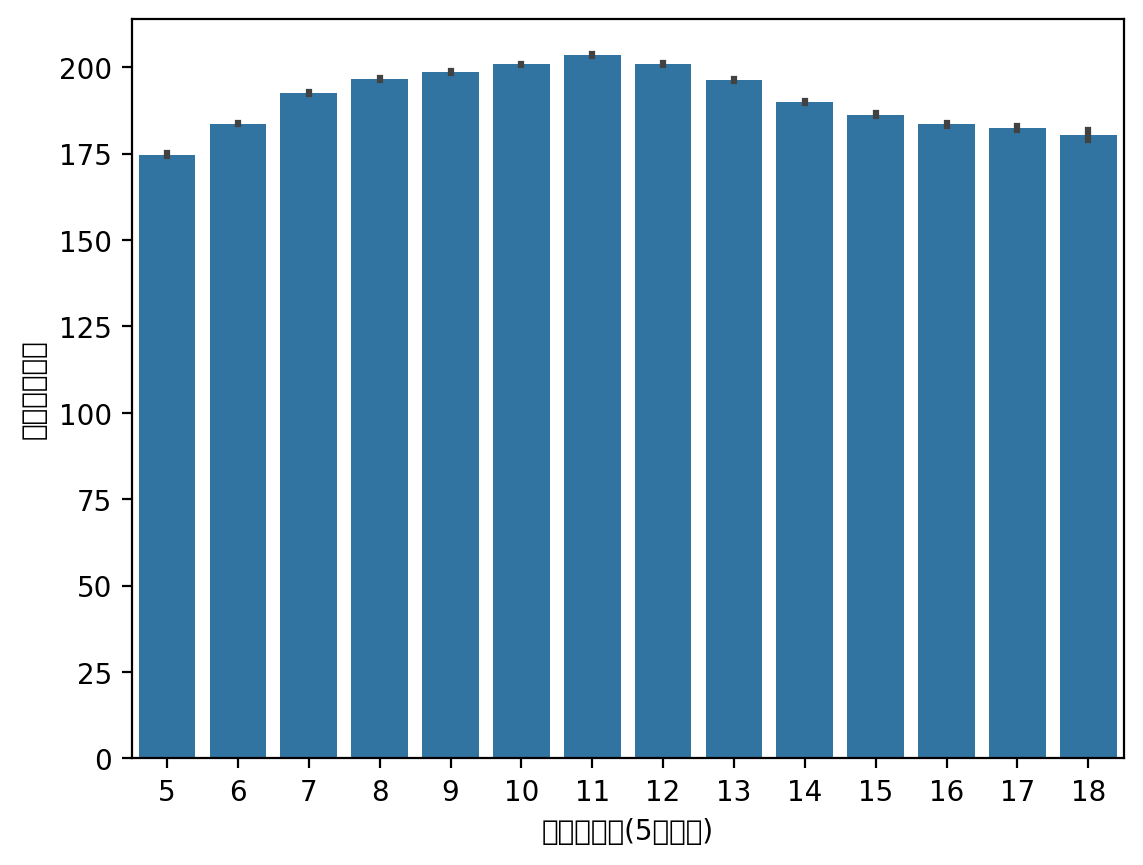

In [62]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

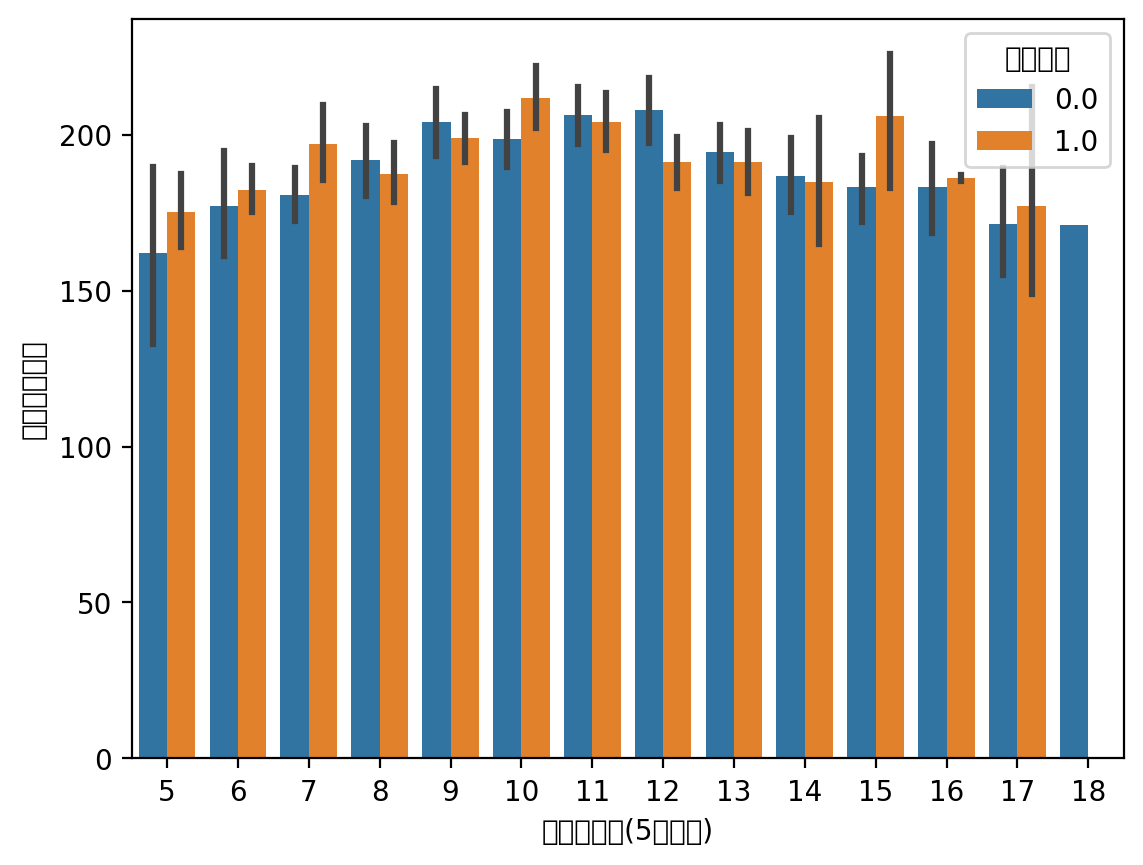

In [65]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<ipython-input-67-d0b5a209cb17>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

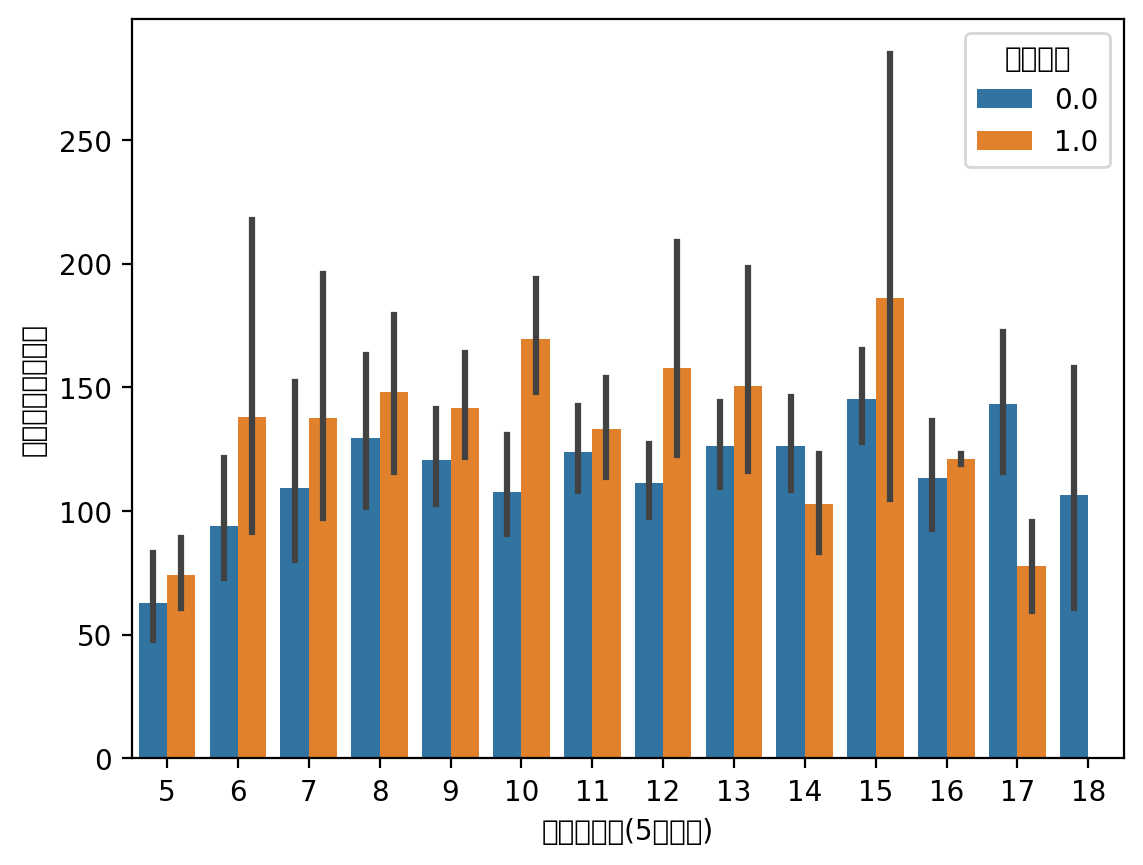

In [67]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)


In [ ]:
# 음주여부와 체중(5Kg 단위)을 성별에 따라 봅니다.



<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

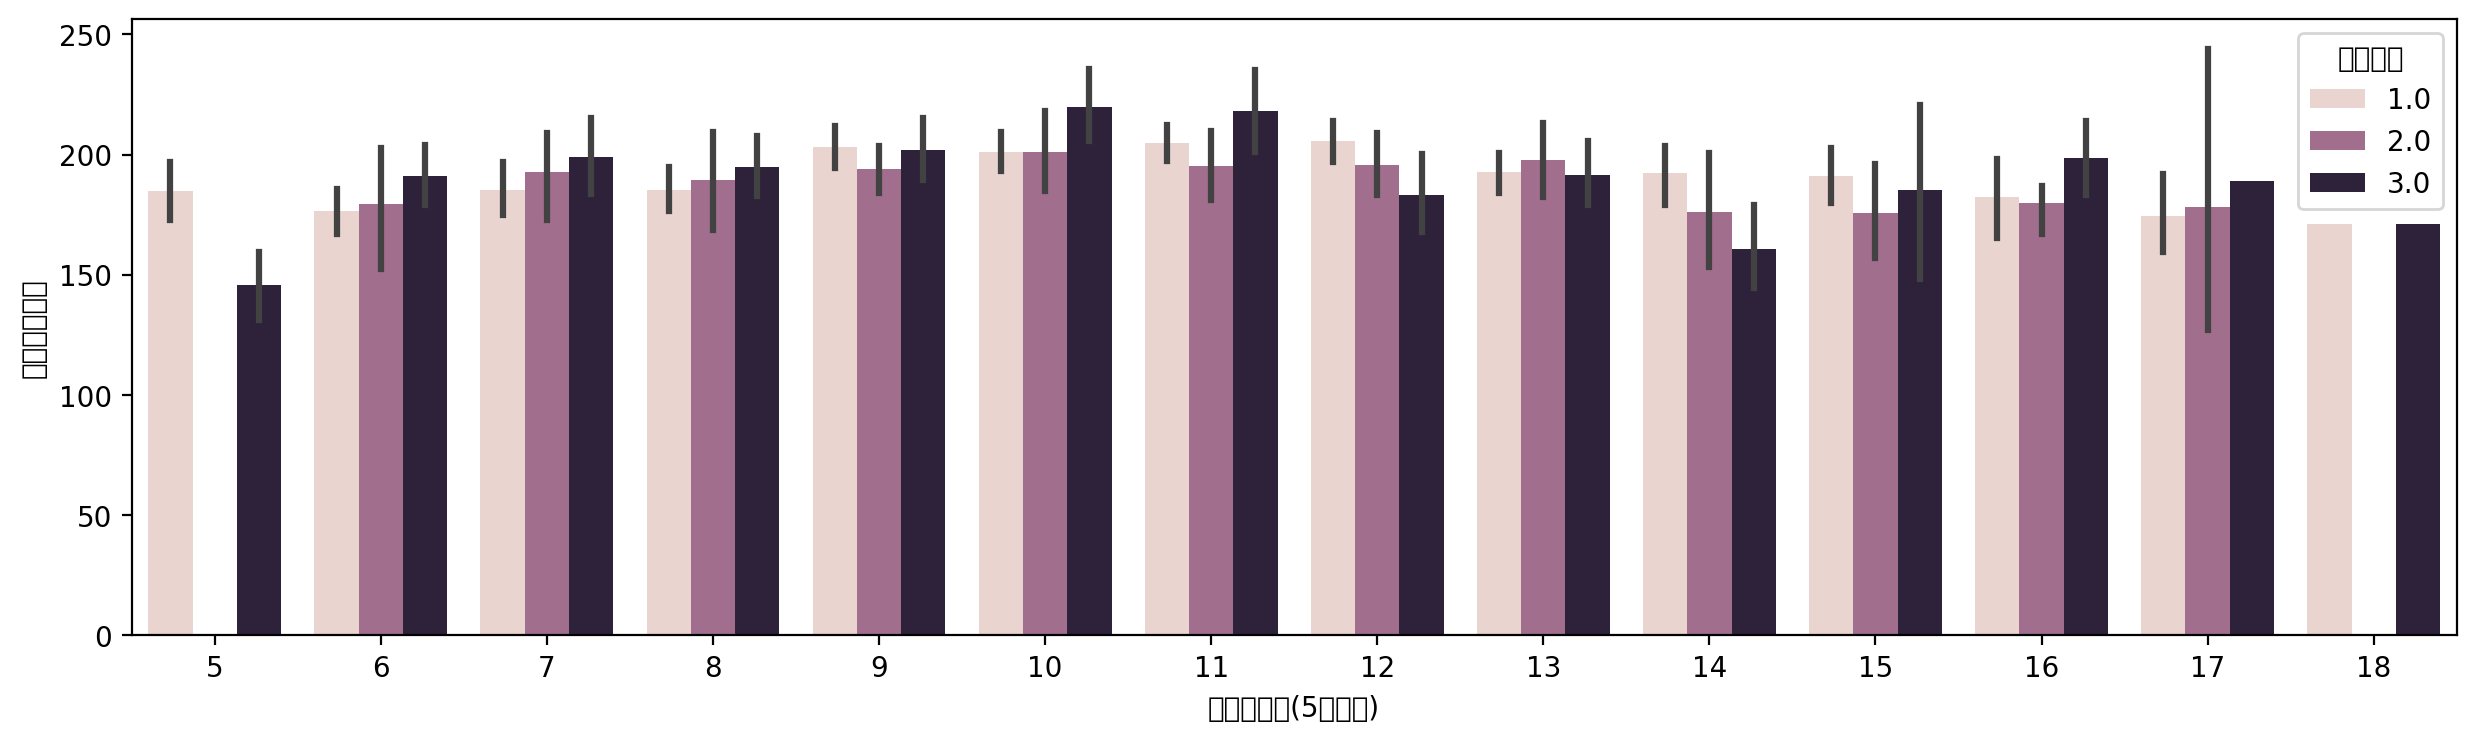

In [66]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 barplot으로 그립니다.
plt.figure(figsize=(15,4))

sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<ipython-input-69-d7d00876a0bf>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

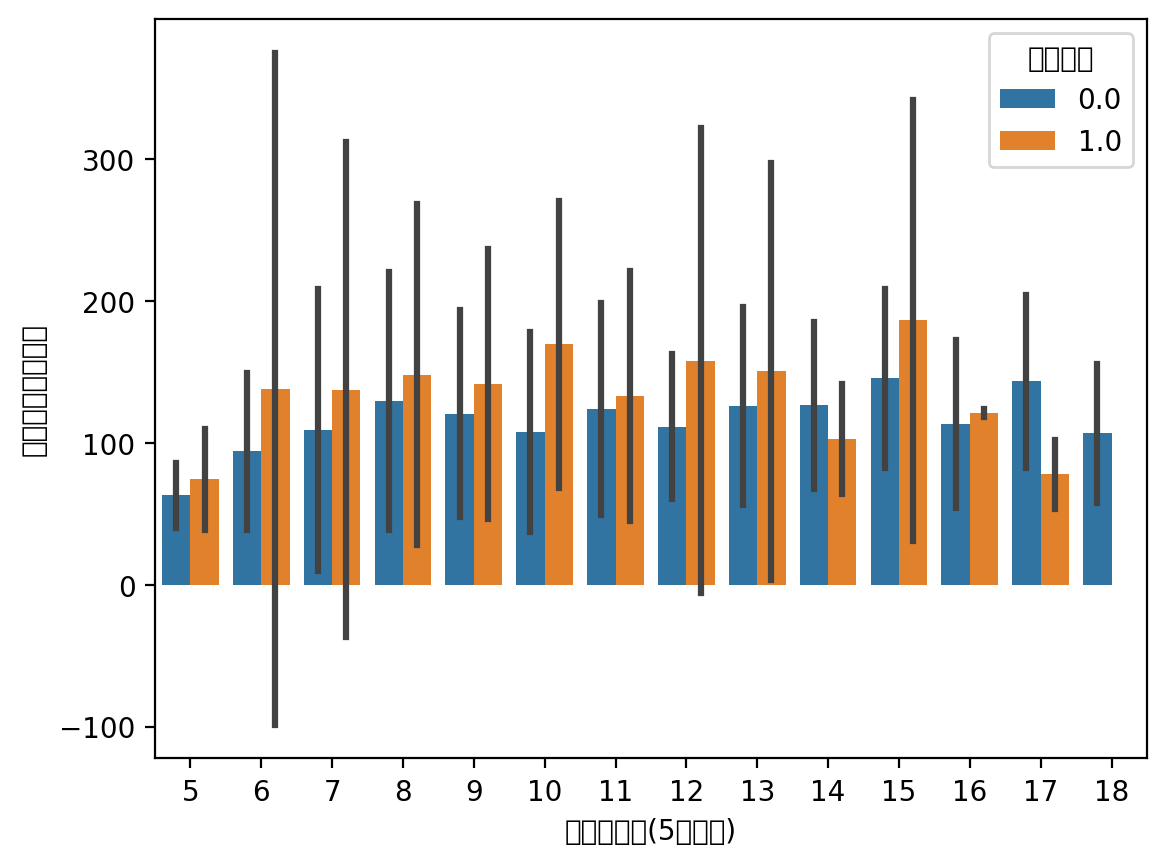

In [69]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")

<ipython-input-70-a63304a22cdd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

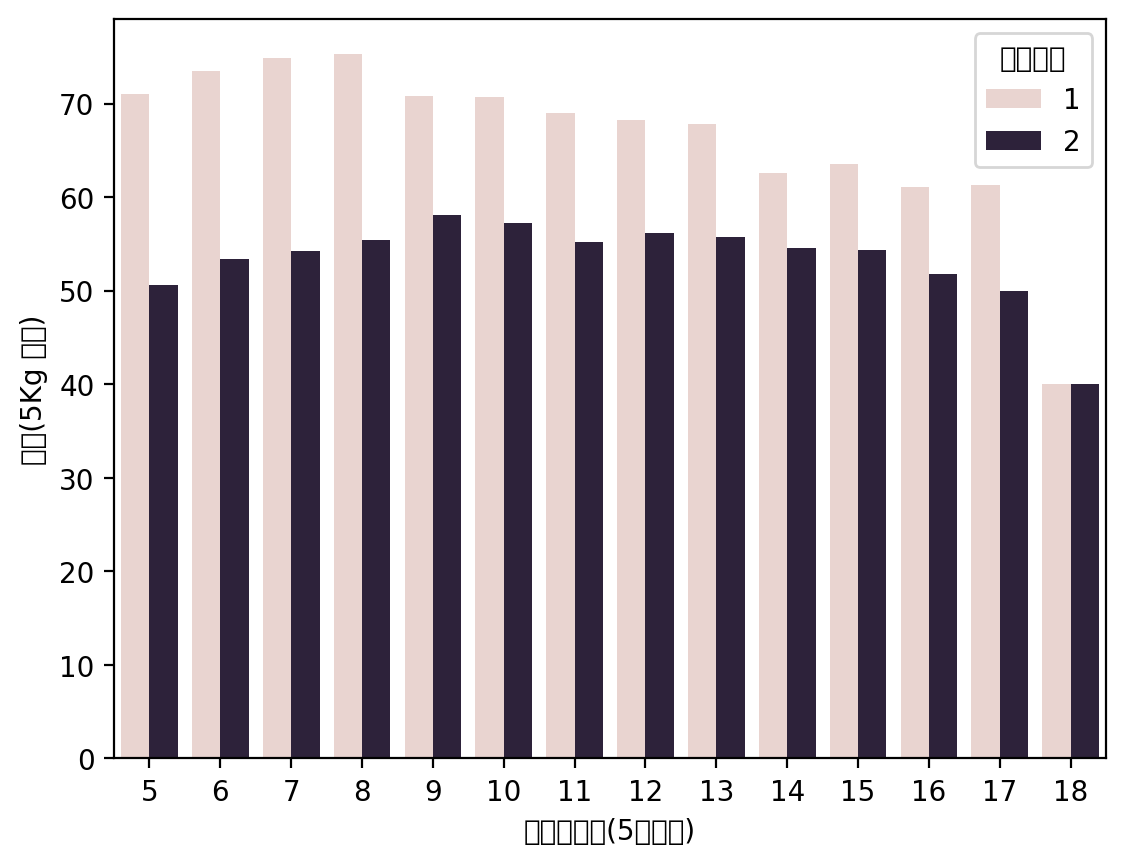

In [70]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)

### lineplot and pointplot

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*

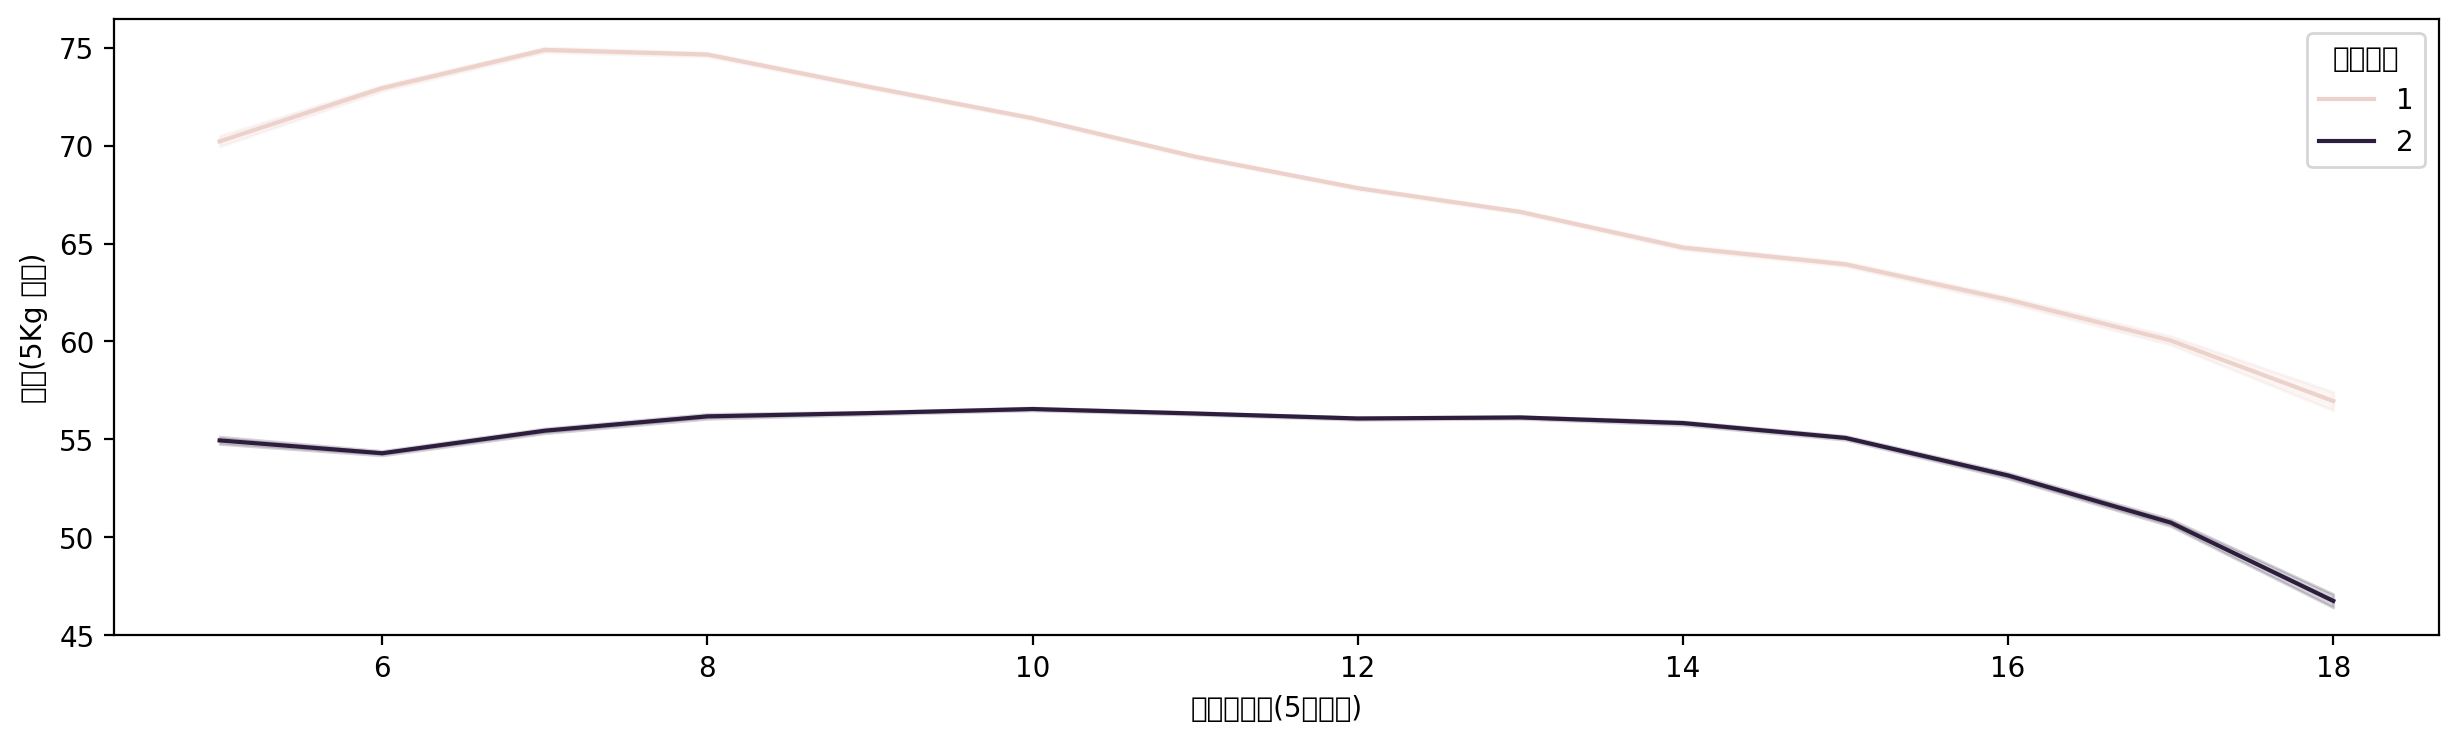

In [97]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 성별코드에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")

In [ ]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 lineplot으로 그립니다.


In [99]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot과 barplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부", ci="sd")

<ipython-input-99-144a2c0b5852>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부", ci="sd")


ValueError: Could not interpret value `신장(5Cm 단위)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x400 with 0 Axes>

In [100]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 pointplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부", ci="sd")


<ipython-input-100-c4b6f40ec895>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부", ci="sd")


ValueError: Could not interpret value `신장(5Cm 단위)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x400 with 0 Axes>

In [104]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm 단위)", hue="음주여부")

ValueError: Could not interpret value `신장(5Cm 단위)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x400 with 0 Axes>

### boxplot

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 :
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*ar

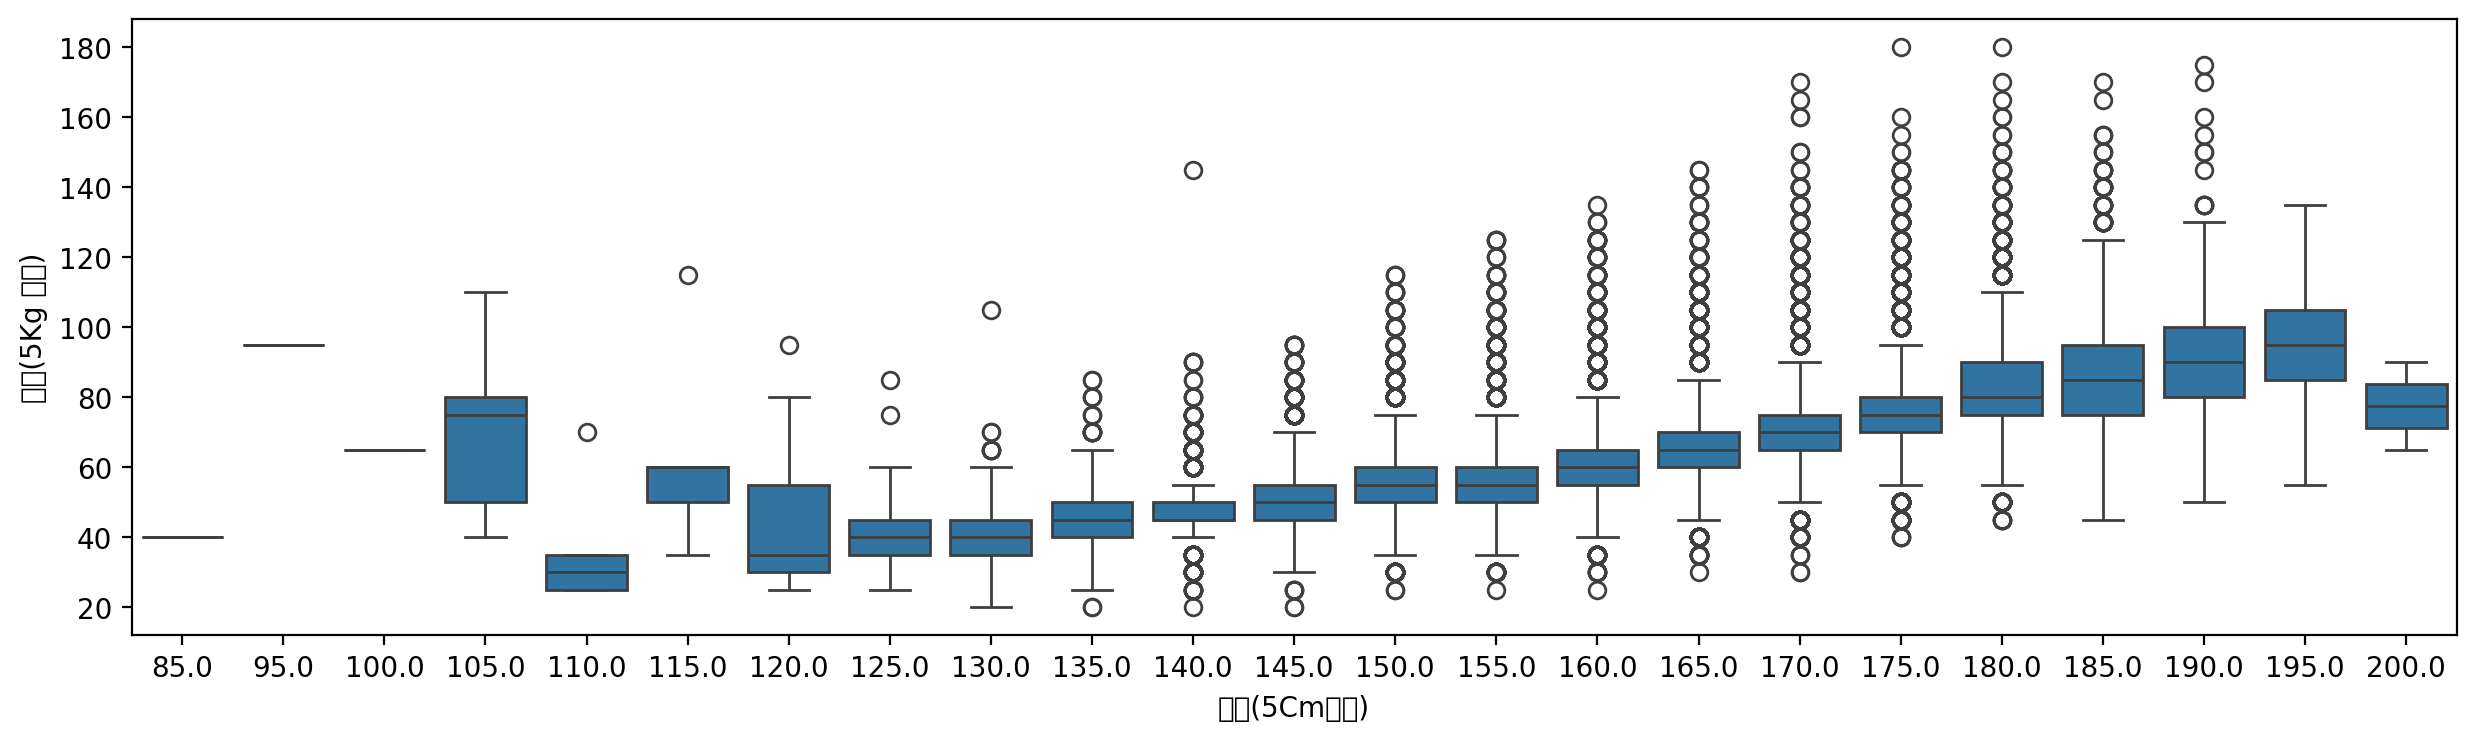

In [105]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위) 을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*ar

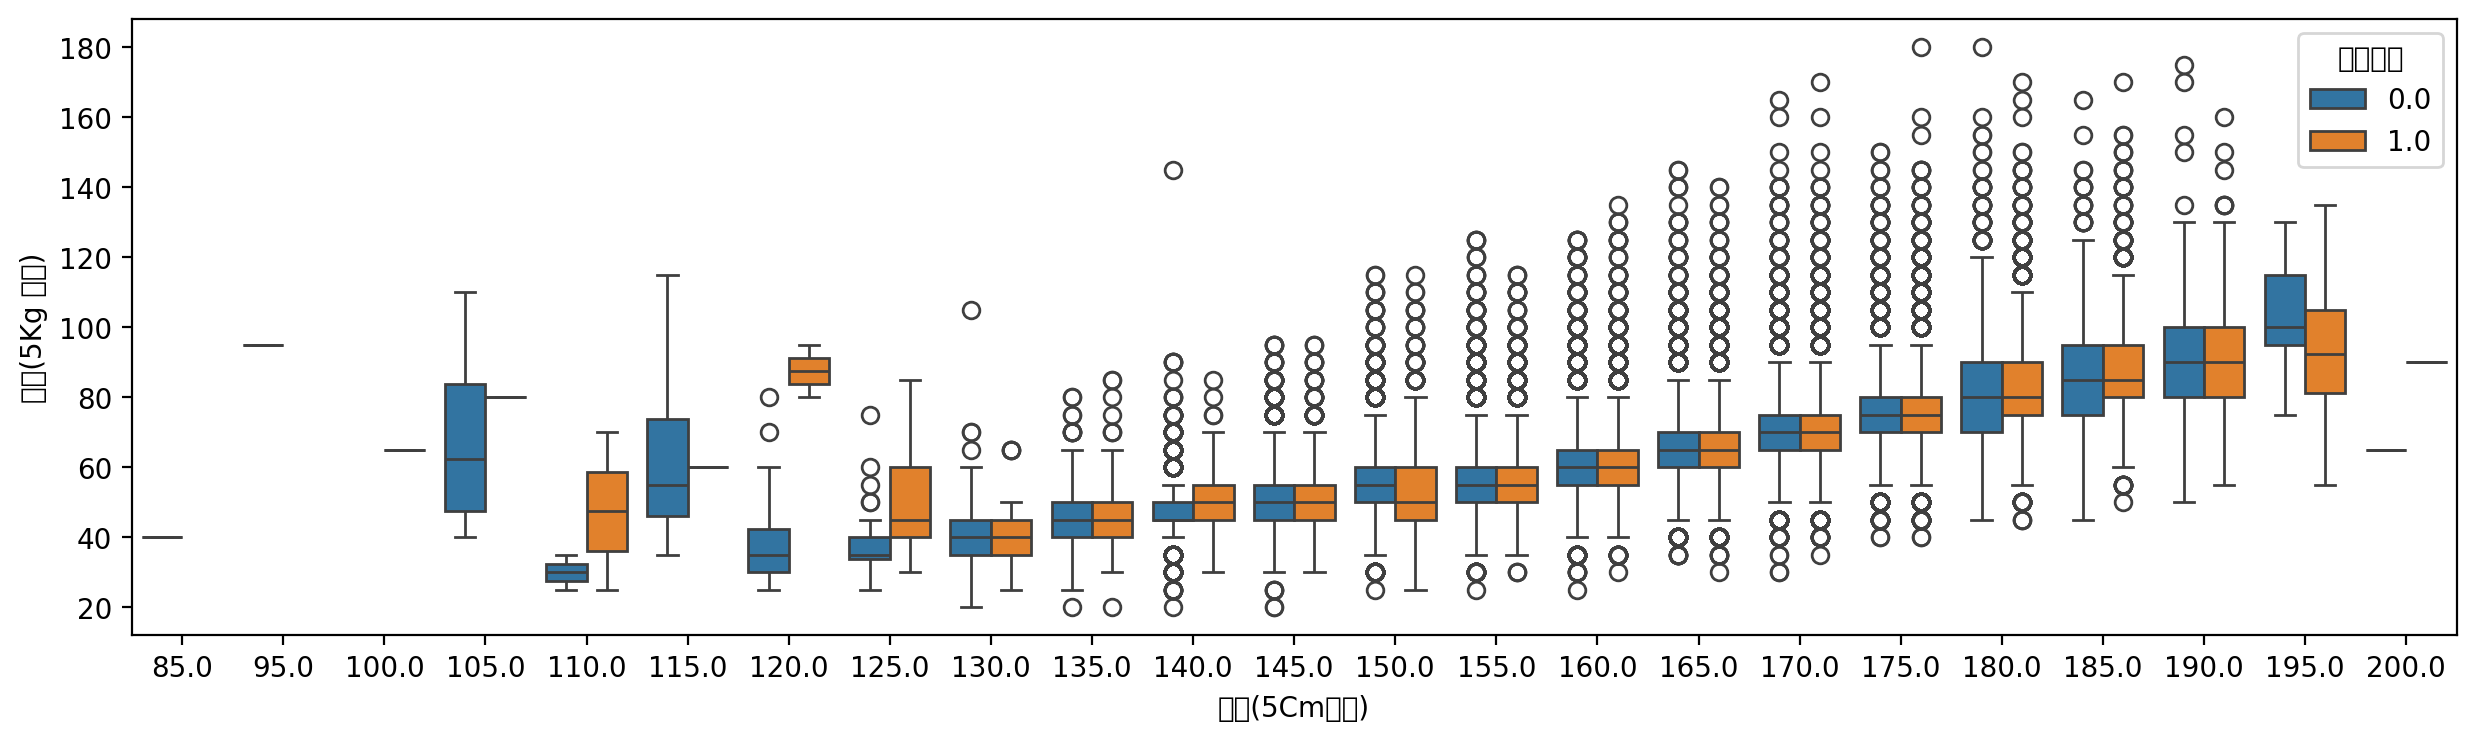

In [106]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

### violinplot

In [ ]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.


In [ ]:
# violinplot의 split 기능을 사용해 봅니다.


In [ ]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.


### swarm plot
* 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

In [ ]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.



In [ ]:
# swarmplot으로 연령대코드(5세단위)에 따른 음주여부 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.


In [ ]:
# lmplot 으로 그리기


## 수치형 데이터 시각화

### scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

In [ ]:
# scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.



### lmplot - 상관 관계를 보기

In [ ]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.


In [ ]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다.



In [ ]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.



`AST와 ALT`
* 출처 : https://sev.iseverance.com/dept_clinic/center/liver/treatment/view.asp?con_no=87827


```
AST와 ALT는 간세포에 들어 있는 효소 입니다.

간이 손상돼 간세포가 파괴되면 그 안에 있던 AST와 ALT 가 빠져 나와 혈액 속에 섞여 돌아다니게 됩니다. 따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.

정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.



간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 하지만 AST 와 ALT 같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이 됩니다.
```

In [ ]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.



### 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
* 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.

In [ ]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT 라는 변수에 담습니다.


In [ ]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현합니다.



In [ ]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담습니다.



In [ ]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.



### distplot
* [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)
* [확률 밀도 함수 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%99%95%EB%A5%A0_%EB%B0%80%EB%8F%84_%ED%95%A8%EC%88%98)

In [ ]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.



In [ ]:
# "총콜레스테롤" 에 따른 distplot 을 그립니다.


In [ ]:
# 음주여부가 1인 값에 대한 "총콜레스테롤" 을 distplot 으로 그립니다.



In [ ]:
# 음주여부가 0인 값에 대한 "총콜레스테롤" 을 distplot 으로 그립니다.



In [ ]:
# 음주여부 값에 대한 "총콜레스테롤" 을 distplot 으로 그리며, 하나의 그래프에 표시되도록 합니다.



In [ ]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.



## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [ ]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레',
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

### 상관계수 구하기

In [ ]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터프레임에 담은 뒤 상관계수를 구합니다.



In [ ]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.



In [ ]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.


In [ ]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.


In [ ]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.


### heatmap
* [Plotting a diagonal correlation matrix — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [ ]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
